In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
import pylab

sns.set()
plt.rcParams['figure.figsize'] = (12, 7)

import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv('data/Index2018.csv', parse_dates=['date'], index_col=0)
data

,spx,dax,ftse,nikkei
date,,,,
1994-07-01,469.900000,2224.95,3445.980000,18124.01
1994-10-01,475.270000,2225.00,3440.580000,18443.44
1994-11-01,474.130000,2228.10,3413.770000,18485.25
1994-12-01,474.170000,2182.06,3372.020000,18793.88
1994-01-13,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...
2018-01-23,2839.130362,13559.60,7731.827774,24124.15
2018-01-24,2837.544008,13414.74,7643.428966,23940.78
2018-01-25,2839.253031,13298.36,7615.839954,23669.49


### QQ-Plots

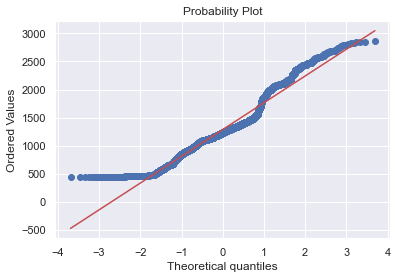

In [9]:
stats.probplot(data.spx, plot=pylab)
pylab.show()